# BNLearn Demo

> pip install bnlearn

Agenda:

- Create syntetic dataset with causal relationships (chains, colliders, forks)
- Learn the causal structure
- Visualise result

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bnlearn as bn

## Create data

Create a dataset with four variables.

- Cloudy: 
    - *P(Cloudy) = 0.75*
- Rain: 
    - *P(Rain|Cloudy) = 0.3*
    - *P(Rain|¬Cloudy) = 0*
- Sprinkler: 
    - *P(Sprinkler|¬Cloudy) = 0.5*
    - *P(Sprinkler|Cloudy) = 0*
- Grass wet:
    - *P(Grass wet|Rain or Sprinkler) = 1.0*
    - *P(Grass wet|¬Rain and ¬Sprinkler) = 0*

In [2]:
n_samples = 10000
cloudy = np.random.choice(2, p=[0.25, 0.75], size=n_samples)
rain = cloudy * np.random.choice(2, p=[0.7, 0.3], size=n_samples)
sprinkler = (1-rain) * (1-cloudy) * np.random.choice(2, p=[0.5, 0.5], size=n_samples)
grass_wet = np.maximum(rain, sprinkler)
data = np.column_stack((cloudy, rain, sprinkler, grass_wet))
df = pd.DataFrame(data, columns=["cloudy", "rain", "sprinkler", "grass_wet"])
df

,cloudy,rain,sprinkler,grass_wet
0,1,0,0,0
1,1,1,0,1
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
9995,0,0,1,1
9996,1,0,0,0
9997,1,1,0,1
9998,0,0,0,0


## Learn causal structure

In [3]:
model = bn.structure_learning.fit(df)
model = bn.independence_test(model, df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]


In [4]:
model.keys()

dict_keys(['model', 'model_edges', 'adjmat', 'config', 'structure_scores', 'independence_test'])

In [5]:
model['independence_test']

,source,target,stat_test,p_value,chi_square,dof
0,cloudy,sprinkler,True,0.000000e+00,4282.448325,1
1,cloudy,rain,True,7.458543e-218,992.554506,1
2,rain,grass_wet,True,0.000000e+00,5404.646098,1
3,sprinkler,grass_wet,True,0.000000e+00,2609.922764,1


In [6]:
model['structure_scores']

{'k2': -12035.408998516985,
 'bds': -12084.38884600171,
 'bic': -12023.933634003473,
 'bdeu': -12058.940934571432}

In [7]:
type(model['model'])

pgmpy.base.DAG.DAG

In [8]:
model['adjmat']

target,cloudy,rain,sprinkler,grass_wet
source,,,,
cloudy,False,True,True,False
rain,False,False,False,True
sprinkler,False,False,False,True
grass_wet,False,False,False,False


## Visualise result

Draw causal graph

[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


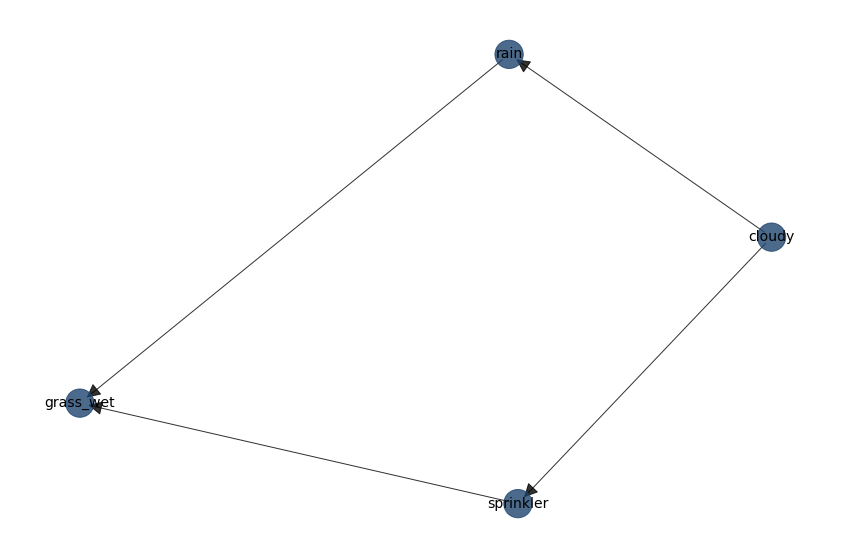

In [9]:
G = bn.plot(model)

## Conclusions

- Method does not consistently discover the "correct" causal relationship in the synthetic data.
    - Sometimes the sprinkler causes clouds, other times the clouds causes the sprinkler.   
